## Modeling

#### Objectives:
*   create a column for the class
*   Standardize the data
*   Split into training data and test data
*   Find best Hyperparameter for SVM, Classification Trees, KNN and Logistic Regression
*   Find the method performs best using test data

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Setting this option will print all collumns of a dfframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the df in a feature
pd.set_option('display.max_colwidth', None)



### Define Auxiliary Functions

In [101]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

### 0. Load Data

In [104]:
# Load Data part I
dfx=pd.read_csv("../data/processed/spacex_falcon9_data_preprocessed.csv") # data\processed\spacex_falcon9_data_preprocessed.csv

# Load Data part II
dfy=pd.read_csv("../data/processed/spacex_falcon9_data_cleaned.csv")

### 1. Data Pre-Processing

#### a) Standardize the data in X and Create a Numpy Array

In [105]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(dfx)

# Create a Numpy array of the target values
Y = dfy['Class'].to_numpy()

#### b) Split in training and test data. 
- The parameter 'test_size' is used to 0.2 and 'random_state' to 2. 

In [106]:
# Split the data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Y_test.shape

(18,)

### 2. Modeling

##### Model 01) Logistic Regression 
- Logistic Regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [107]:
# Parameters for Model
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

lr=LogisticRegression() # Logistic Regression object
logreg_cv=GridSearchCV(lr,parameters,cv=10) # GridSearchCV object
logreg_cv.fit(X_train,Y_train) # Fit the object to find the best parameters from the dictionary parameters.

print("Tuned Hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy (best score):",logreg_cv.best_score_)

Tuned Hyperparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy (best score): 0.8892857142857145


##### Model 02) Support Vector Machine (SVM)
Create a **support vector machine** object then create a GridSearchCV object svm_cv with cv = 10. 

In [108]:
# Parameters for Model
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

svm = SVC() # Support Vector Machine object
svm_cv = GridSearchCV(svm, parameters, cv=10) # GridSearchCV object
svm_cv.fit(X_train, Y_train) # Fit the object to find the best parameters from the dictionary parameters.

print("Tuned Hyperparameters :(best parameters) ",svm_cv.best_params_)
print("Accuracy (best score):",svm_cv.best_score_)

Tuned Hyperparameters :(best parameters)  {'C': np.float64(31.622776601683793), 'gamma': np.float64(0.001), 'kernel': 'rbf'}
Accuracy (best score): 0.9178571428571429


##### Model 03) Decision Tree Classifier
Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10.

In [109]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', 'log2', None], 
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier() # Decision Tree Classifier object
tree_cv = GridSearchCV(tree, parameters, cv=10) # GridSearchCV object  
tree_cv.fit(X_train, Y_train) # Fit the object to find the best parameters from the dictionary parameters.

print("Tuned Hyperparameters :(best parameters) ",tree_cv.best_params_)
print("Accuracy (best score):",tree_cv.best_score_)


Tuned Hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy (best score): 0.9178571428571429


##### Model 04) K Nearest Neighbors (KNN)
Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. 

In [110]:
# Parameters for Model
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier() # K Nearest Neighbors object
knn_cv = GridSearchCV(KNN, parameters, cv=10) # GridSearchCV object
knn_cv.fit(X_train, Y_train) # Fit the object to find the best parameters from the dictionary parameters.

print("Tuned Hyperparameters :(best parameters) ",knn_cv.best_params_)
print("Accuracy (best score):",knn_cv.best_score_)

Tuned Hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy (best score): 0.875


### 3. Evaluation the Models
We output the GridSearchCV object for all models. We display the best parameters using the data attribute best_params_ and the accuracy on the validation data using the data attribute best_score_.

##### i) Calculate the Accuracy on the Test Data

In [111]:
# Logistic Regression
accuracy_logreg = logreg_cv.score(X_test, Y_test)

# Support Vector Machine
accuracy_svm = svm_cv.score(X_test, Y_test)

# Decision Tree
accuracy_tree = tree_cv.score(X_test, Y_test)

# K Nearest Neighbors
accuracy_knn = knn_cv.score(X_test, Y_test)

# Print the accuracy
print("Accuracy of Models on test data:")
print("\nLogistic Regression: ", accuracy_logreg)
print("SVM: ", accuracy_svm)
print("Decision Tree: ", accuracy_tree)
print("KNN: ", accuracy_knn)

Accuracy of Models on test data:

Logistic Regression:  0.7777777777777778
SVM:  0.7777777777777778
Decision Tree:  0.7777777777777778
KNN:  0.7222222222222222


**💡Insights:**

Although Logistic Regression, SVM, and Decision Tree achieved the same numerical accuracy, their real-world performance should be evaluated beyond just accuracy. In the context of rocket landing predictions:
- Logistic Regression is typically more interpretable and showed strong results in earlier confusion matrix analysis (e.g., zero false negatives).
- Decision Tree provides slightly more flexibility and explainability through decision rules, but may introduce false negatives.
- Therefore, Logistic Regression may be preferred due to its balanced performance and safety in prediction, even if other models match its accuracy.
---

#### ii) Plot the Confusion Matrix

In rocket landings, model performance should be evaluated carefully because:

True Positives (TP): The model predicts a successful landing, and the rocket actually lands successfully.
- ✅ Ideal and desired outcome — contributes to confidence in reusability planning.

True Negatives (TN): The model predicts failure, and the rocket indeed fails to land.
- ✅ Acceptable — helps prevent overconfidence and ensures proper caution is taken.

False Positives (FP): The model predicts a successful landing, but the rocket actually fails.
- ❌ Highly risky — may lead to incorrect decisions about reusability, mission continuity, or cost estimation, and could result in asset loss or mission failure.

False Negatives (FN): The model predicts failure, but the rocket actually lands successfully.
- ⚠️ Less risky than FP — the outcome is conservative, but it may cause missed opportunities for reusing hardware and optimizing cost.


**Most Critical Classification Errors for This Project**
- The most critical error is the **False Positive (FP)**, because it can lead to overestimation of mission reliability and unsafe operational decisions, potentially resulting in hardware loss, financial waste, or mission failure.
- **False Negatives (FN)** are less harmful in this context but still important to minimize, as they can impact cost-efficiency and reuse strategy.

Logistic Regression:


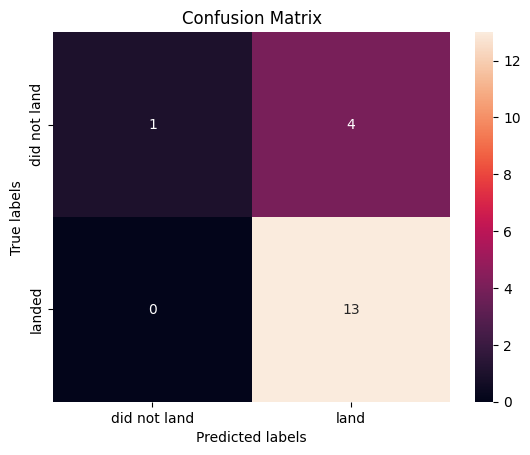

In [112]:
# Logistic Regression   
print("Logistic Regression:")
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Support Vector Machine:


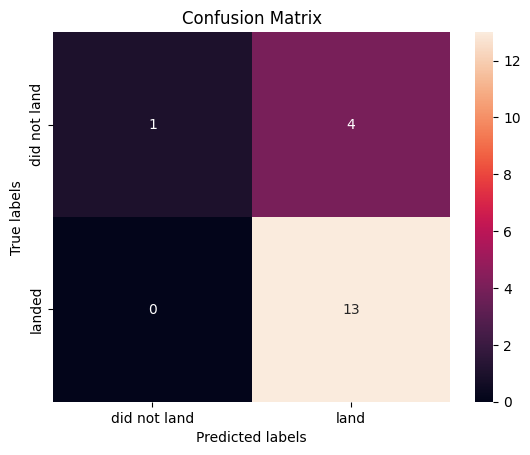

In [113]:
# Support Vector Machine
print("Support Vector Machine:")
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Decision Tree:


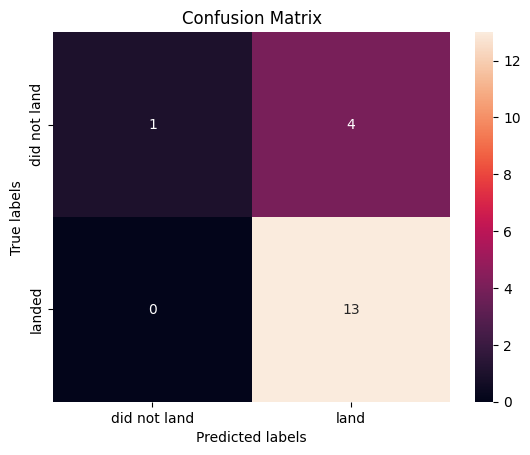

In [114]:
# Decision Tree
print("Decision Tree:")
yhat=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see then Logistic Regression, SVM, Decision Tree obteined the same values for:
- True Positive (TP) = 13 (True label is landed, Predicted label is also landed)
- False Positive (FP) = 4 (True label is not landed, Predicted label is landed)

K Nearest Neighbors:


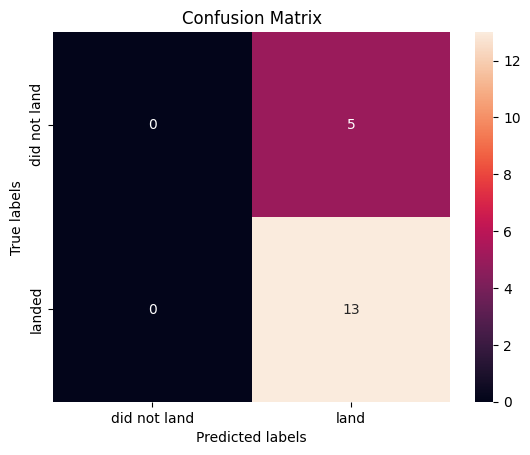

In [115]:
# K Nearest Neighbors
print("K Nearest Neighbors:")
yhat=knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#####  Analysis by Model

- All models correctly predicted 100% of successful landings (FN = 0), which is crucial in the rocket landing context.
- Logistic Regression, SVM, and Decision Tree shared the same performance: 4 false positives and 1 true negative.
- KNN had the worst performance in identifying failures, with 5 false positives and 0 true negatives — meaning it failed to detect any unsuccessful landings.
- Despite equal accuracy, KNN over-predicts success, which may be riskier in real-world deployment.

## 4. Select the Best Model

Text(0.5, 1.0, 'Model Accuracy Comparison')

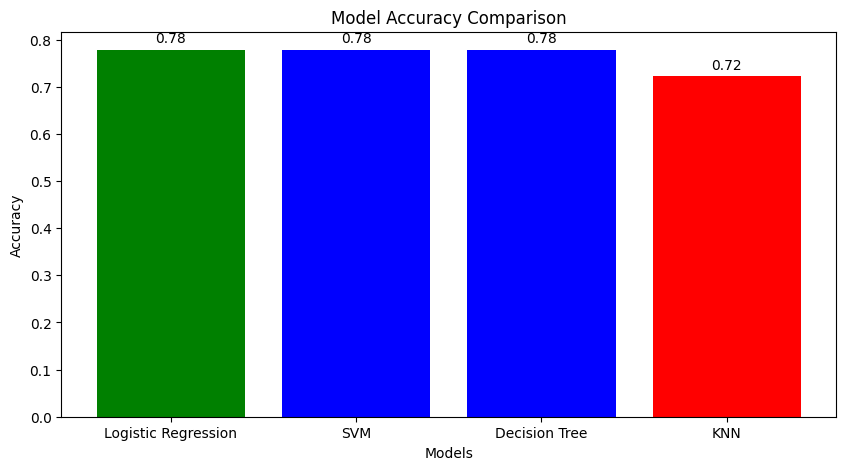

In [116]:
# Model accuracy results (assume these variables are already defined)
results = {
    'Logistic Regression': accuracy_logreg,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_tree,
    'KNN': accuracy_knn
}

# Sort the results in descending order of accuracy
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

# Create the bar plot
plt.figure(figsize=(10, 5))
bars = plt.bar(sorted_results.keys(), sorted_results.values(), color=['green', 'blue', 'blue', 'red'])

# Add accuracy value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # offset above the bar
                 textcoords="offset points",
                 ha='center', va='bottom')

# Add plot labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')


**✅Conclusion:**

Logistic Regression is selected as the best-performing model due to its strong predictive accuracy, conservative behavior (no false negatives), and operational robustness — aligning with SpaceY's mission safety and cost-efficiency priorities. Logistic Regression offers the best balance between performance and safety:
- It achieved zero false negatives, meaning it successfully identified all actual landings.
- Although it produced some false positives, it maintained a consistent pattern of correct classifications.
- Its simplicity and interpretability make it ideal for operational decision-making in a safety-critical environment like rocket recovery.

